In [2]:
import numpy as np
import pandas as pd
import os
from sklearn.cluster import KMeans
from scipy.stats import ortho_group
import matplotlib.pyplot as plt
%matplotlib inline

# plot parameters
param = "param "
NUMBER_OF_POINTS = "NumberOfPoints"
NUMBER_OF_CLUSTERS = "NumberOfClusters"
NUMBER_OF_DIMENSIONS = "NumberOfDimensions"

assignment = ":="
end =";"
# plot parameters
colors = np.array(['blue','green','red','cyan','magenta','yellow','black'])
marker_size = 100
marker_alpha = 0.25



def GenCluster(n,mu,std,rot=True):
    d = len(mu)
    coords = np.random.normal(loc=mu,scale=std,size=(n,d))
    if rot == True:    
        Q = ortho_group.rvs(d)
        mu = np.array(mu)
        coords = np.matmul(coords-mu,Q)
        coords = coords + mu
    return coords

def GenerateClusters(num_points=[100,100,100],STD=[[1,1],[1,1],[1,1]],rot=True):
    num_points = np.array(num_points)
    STD = np.array(STD)
    (num_clusters,d) = STD.shape
    MU = np.random.uniform(low=-10,high=10,size=(num_clusters,d))
    N = num_points.sum()
    coords = np.zeros((N,d))
    labels = np.zeros(N,dtype='int')
    i0 = 0
    for k in np.arange(num_clusters): 
        n = num_points[k]
        mu = MU[k,:]
        std = STD[k,:]
        coords[i0:i0+n,:] = GenCluster(n,mu,std,rot=rot)
        labels[i0:i0+n]   = k
        i0 = i0 + n
    return (coords,labels)


In [3]:

# cluster parameters
num_points = [100,100,100]
STD = [[1,1],[1,1],[1,1]]
rot = True

(coords,labels) = GenerateClusters(num_points=num_points,STD=STD,rot=rot)

In [4]:
df = pd.DataFrame(coords, columns=['x','y'])
df.head()

,x,y
0,5.962560,-5.352259
1,5.132919,-6.171549
2,5.045165,-7.970322
3,6.976509,-7.329312
4,5.594578,-4.721164


In [5]:
arr = df.values
for k in range(len(arr)):
    for i in range(2):
        print(k+1,i+1,arr[k][i])
        import os


1 1 5.962560249120155
1 2 -5.352258581506458
2 1 5.13291933322096
2 2 -6.171549112626192
3 1 5.04516466627061
3 2 -7.970322414215624
4 1 6.976508659538026
4 2 -7.329312427837721
5 1 5.5945781233967065
5 2 -4.721164290148561
6 1 5.813933665590282
6 2 -6.55476999264151
7 1 5.815042149618143
7 2 -6.308521821095137
8 1 7.055426501272955
8 2 -7.522952820391762
9 1 6.718635603801988
9 2 -7.494847075705284
10 1 5.988173387684075
10 2 -6.5214994524203584
11 1 5.691994303572089
11 2 -4.9451561179457535
12 1 6.653323832735061
12 2 -7.00423813611876
13 1 5.273787224003327
13 2 -6.664582759723589
14 1 6.435777039049632
14 2 -5.608382406773328
15 1 5.27827699663565
15 2 -6.179356786156292
16 1 6.359281319865163
16 2 -6.897960669641508
17 1 5.701084588574817
17 2 -4.5835168458513955
18 1 5.912064949892342
18 2 -7.251272612791125
19 1 6.191660086562986
19 2 -4.146255984004457
20 1 5.71577222180012
20 2 -7.476182663047949
21 1 6.796878587522209
21 2 -5.5913869241879475
22 1 5.096493853021243
22 2 -6.3

In [54]:
df = df.reset_index()
df['Index'] = df.index+1

In [55]:
df.head()

,index,x,y,Index
0,0,7.813795,-5.191861,1
1,1,7.119969,-5.931231,2
2,2,8.750411,-5.864519,3
3,3,7.746324,-6.585354,4
4,4,9.393171,-7.089528,5


Text(0.5, 1.0, 'KMeans Clusters')

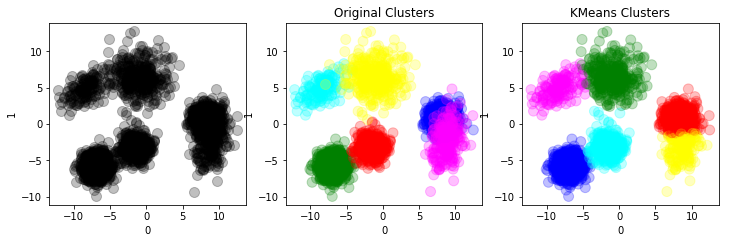

In [56]:
K = 6
num_points = [800,1000,600,150,260,350]
STD = [[1,1],[1,1],[1,1],[1,2],[2,1],[2,2]]
(coords,labels) = GenerateClusters(num_points=num_points,STD=STD)
df = pd.DataFrame(coords)
df['cluster'] = colors[labels]
labels_kmeans = KMeans(n_clusters=K).fit_predict(coords)
df['KMeans']  = colors[labels_kmeans]
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(12,5))
plot1 = df.plot.scatter(x=0,y=1,c='black',s=marker_size,alpha=marker_alpha,ax=axes[0])
plot1.set_aspect('equal')
plot2 = df.plot.scatter(x=0,y=1,c=df.cluster.values,s=marker_size,alpha=marker_alpha,ax=axes[1])
plot2.set_aspect('equal')
plot2.set_title('Original Clusters')
plot3 = df.plot.scatter(x=0,y=1,c=df.KMeans.values,s=marker_size,alpha=marker_alpha,ax=axes[2])
plot3.set_aspect('equal')
plot3.set_title('KMeans Clusters')

In [57]:
df.to_csv('3CentroidTest_Points.csv')

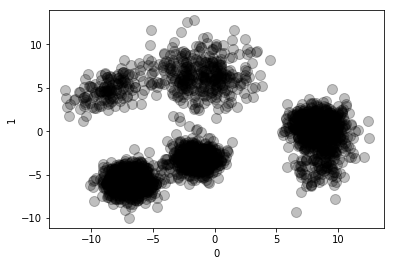

In [58]:
plot1 = df.plot.scatter(x=0,y=1,c='black',s=marker_size,alpha=marker_alpha)

Text(0.5, 1.0, 'KMeans Clusters')

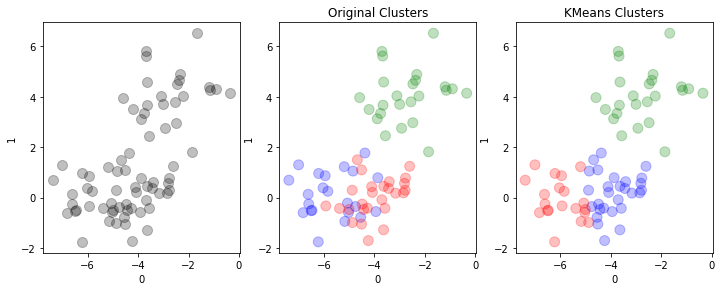

In [59]:
K = 3
num_points = [22,24,26]
STD = [[1,1],[1,1],[1,1]]
(coords,labels) = GenerateClusters(num_points=num_points,STD=STD)
df = pd.DataFrame(coords)
df['cluster'] = colors[labels]
labels_kmeans = KMeans(n_clusters=K).fit_predict(coords)
df['KMeans']  = colors[labels_kmeans]
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(12,5))
plot1 = df.plot.scatter(x=0,y=1,c='black',s=marker_size,alpha=marker_alpha,ax=axes[0])
plot1.set_aspect('equal')
plot2 = df.plot.scatter(x=0,y=1,c=df.cluster.values,s=marker_size,alpha=marker_alpha,ax=axes[1])
plot2.set_aspect('equal')
plot2.set_title('Original Clusters')
plot3 = df.plot.scatter(x=0,y=1,c=df.KMeans.values,s=marker_size,alpha=marker_alpha,ax=axes[2])
plot3.set_aspect('equal')
plot3.set_title('KMeans Clusters')

In [60]:
folder = "INF_NORM_TEST/"
dat_file_name = "3_by_1.dat"
output_dir = folder+dat_file_name
if not os.path.exists(folder):
    os.makedirs(folder)

In [61]:
fo = open(folder+dat_file_name, "w+")
fo.write(param+NUMBER_OF_POINTS+assignment+"72"+end+"\n")
fo.write(param+NUMBER_OF_DIMENSIONS+assignment+"2"+end+"\n")
fo.write(param+NUMBER_OF_CLUSTERS+assignment+str(K)+end+"\n")
fo.write(param+"Point"+assignment+"\n")
arr = df.values
for k in range(len(arr)):
    for i in range(2):
        fo.write(str(k+1)+" "+str(i+1)+" "+str(arr[k][i])+"\n")
fo.write(end)
fo.close()


In [62]:
folder = "lim_as_n_goes_inf/"
dat_file_name = "big.dat"
output_dir = folder+dat_file_name
if not os.path.exists(folder):
    os.makedirs(folder)

Text(0.5, 1.0, 'KMeans Clusters')

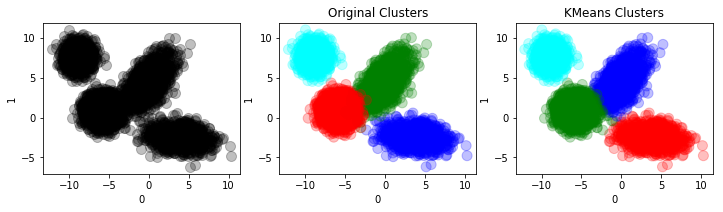

In [63]:
K = 4
num_points = [1000,1400,3000,1234]
STD = [[1,2],[1,2],[1,1],[1,1]]
(coords,labels) = GenerateClusters(num_points=num_points,STD=STD)
df = pd.DataFrame(coords)
df['cluster'] = colors[labels]
labels_kmeans = KMeans(n_clusters=K).fit_predict(coords)
df['KMeans']  = colors[labels_kmeans]
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(12,5))
plot1 = df.plot.scatter(x=0,y=1,c='black',s=marker_size,alpha=marker_alpha,ax=axes[0])
plot1.set_aspect('equal')
plot2 = df.plot.scatter(x=0,y=1,c=df.cluster.values,s=marker_size,alpha=marker_alpha,ax=axes[1])
plot2.set_aspect('equal')
plot2.set_title('Original Clusters')
plot3 = df.plot.scatter(x=0,y=1,c=df.KMeans.values,s=marker_size,alpha=marker_alpha,ax=axes[2])
plot3.set_aspect('equal')
plot3.set_title('KMeans Clusters')

Text(0.5,1,'KMeans Clusters')

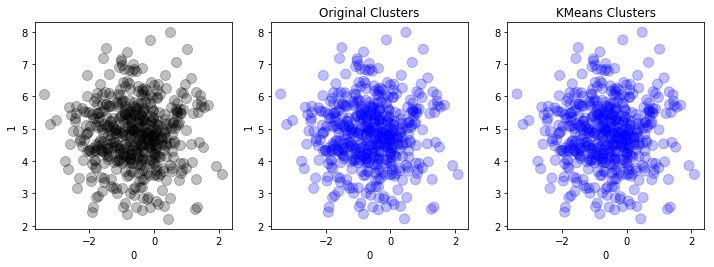

In [13]:
K = 1
num_points = [500]
STD = [[1,1]]
(coords,labels) = GenerateClusters(num_points=num_points,STD=STD)
df = pd.DataFrame(coords)
df['cluster'] = colors[labels]
labels_kmeans = KMeans(n_clusters=K).fit_predict(coords)
df['KMeans']  = colors[labels_kmeans]
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(12,5))
plot1 = df.plot.scatter(x=0,y=1,c='black',s=marker_size,alpha=marker_alpha,ax=axes[0])
plot1.set_aspect('equal')
plot2 = df.plot.scatter(x=0,y=1,c=df.cluster.values,s=marker_size,alpha=marker_alpha,ax=axes[1])
plot2.set_aspect('equal')
plot2.set_title('Original Clusters')
plot3 = df.plot.scatter(x=0,y=1,c=df.KMeans.values,s=marker_size,alpha=marker_alpha,ax=axes[2])
plot3.set_aspect('equal')
plot3.set_title('KMeans Clusters')

In [14]:
folder = "1Big/"
dat_file_name = "500Points.dat"
point_csv = "500Points.csv"
output_dir = folder+dat_file_name
if not os.path.exists(folder):
    os.makedirs(folder)
df['ID'] = range(1, 1+len(df))

In [15]:
df.to_csv(folder+point_csv)
fo = open(folder+dat_file_name, "w+")
fo.write(param+NUMBER_OF_POINTS+assignment+str(sum(num_points))+end+"\n")
fo.write(param+NUMBER_OF_DIMENSIONS+assignment+"2"+end+"\n")
fo.write(param+NUMBER_OF_CLUSTERS+assignment+str(K)+end+"\n")
fo.write(param+"Point"+assignment+"\n")
arr = df.values
for k in range(len(arr)):
    for i in range(2):
        fo.write(str(k+1)+" "+str(i+1)+" "+str(arr[k][i])+"\n")
fo.write(end)
fo.close()